In [1]:
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.ar_model import AutoRegResults
from sklearn.model_selection import train_test_split
from pylab import rcParams


In [3]:
data=pd.read_csv("co2-ppm-daily.csv")

In [4]:
data

,date,value
0,1968-03-30,316.16
1,1968-03-31,316.40
2,1968-04-01,317.67
3,1968-04-02,317.76
4,1968-04-03,317.09
...,...,...
18759,2019-08-09,406.88
18760,2019-08-10,408.26
18761,2019-08-11,407.53
18762,2019-08-12,407.30


In [5]:
temp=data['date'].values
temp2 = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in temp]
data['date'] = temp2

del temp,temp2

In [6]:
data['date'].values

array(['1968-03-30T00:00:00.000000000', '1968-03-31T00:00:00.000000000',
       '1968-04-01T00:00:00.000000000', ...,
       '2019-08-11T00:00:00.000000000', '2019-08-12T00:00:00.000000000',
       '2019-08-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [7]:
data

,date,value
0,1968-03-30,316.16
1,1968-03-31,316.40
2,1968-04-01,317.67
3,1968-04-02,317.76
4,1968-04-03,317.09
...,...,...
18759,2019-08-09,406.88
18760,2019-08-10,408.26
18761,2019-08-11,407.53
18762,2019-08-12,407.30


In [8]:
cols=['date','value']

In [9]:
data

,date,value
0,1968-03-30,316.16
1,1968-03-31,316.40
2,1968-04-01,317.67
3,1968-04-02,317.76
4,1968-04-03,317.09
...,...,...
18759,2019-08-09,406.88
18760,2019-08-10,408.26
18761,2019-08-11,407.53
18762,2019-08-12,407.30


In [10]:
data=data.sort_values('date')

In [11]:
data.isnull().sum()

date     0
value    0
dtype: int64

In [12]:
data = data.groupby('date')['value'].sum().reset_index()

In [13]:
data

,date,value
0,1968-03-30,316.16
1,1968-03-31,316.40
2,1968-04-01,317.67
3,1968-04-02,317.76
4,1968-04-03,317.09
...,...,...
18759,2019-08-09,406.88
18760,2019-08-10,408.26
18761,2019-08-11,407.53
18762,2019-08-12,407.30


In [14]:
CO2=data['value']
train_size = int(len(data) * 0.95)
train_size

17825

In [15]:
train, test = data[0:train_size], data[train_size:len(data)]

In [16]:
train

,date,value
0,1968-03-30,316.16
1,1968-03-31,316.40
2,1968-04-01,317.67
3,1968-04-02,317.76
4,1968-04-03,317.09
...,...,...
17820,2017-01-12,400.04
17821,2017-01-13,399.99
17822,2017-01-14,399.80
17823,2017-01-15,399.83


In [17]:
train = train.set_index('date')


In [18]:
train['value']

date
1968-03-30    316.16
1968-03-31    316.40
1968-04-01    317.67
1968-04-02    317.76
1968-04-03    317.09
               ...  
2017-01-12    400.04
2017-01-13    399.99
2017-01-14    399.80
2017-01-15    399.83
2017-01-16    400.35
Name: value, Length: 17825, dtype: float64

In [19]:
y = train['value'].resample('D').mean()
y

date
1968-03-30    316.16
1968-03-31    316.40
1968-04-01    317.67
1968-04-02    317.76
1968-04-03    317.09
               ...  
2017-01-12    400.04
2017-01-13    399.99
2017-01-14    399.80
2017-01-15    399.83
2017-01-16    400.35
Freq: D, Name: value, Length: 17825, dtype: float64

In [20]:
y=y.fillna(method = 'ffill')
y

date
1968-03-30    316.16
1968-03-31    316.40
1968-04-01    317.67
1968-04-02    317.76
1968-04-03    317.09
               ...  
2017-01-12    400.04
2017-01-13    399.99
2017-01-14    399.80
2017-01-15    399.83
2017-01-16    400.35
Freq: D, Name: value, Length: 17825, dtype: float64

In [21]:
y=y.fillna(method = 'ffill')
y

date
1968-03-30    316.16
1968-03-31    316.40
1968-04-01    317.67
1968-04-02    317.76
1968-04-03    317.09
               ...  
2017-01-12    400.04
2017-01-13    399.99
2017-01-14    399.80
2017-01-15    399.83
2017-01-16    400.35
Freq: D, Name: value, Length: 17825, dtype: float64

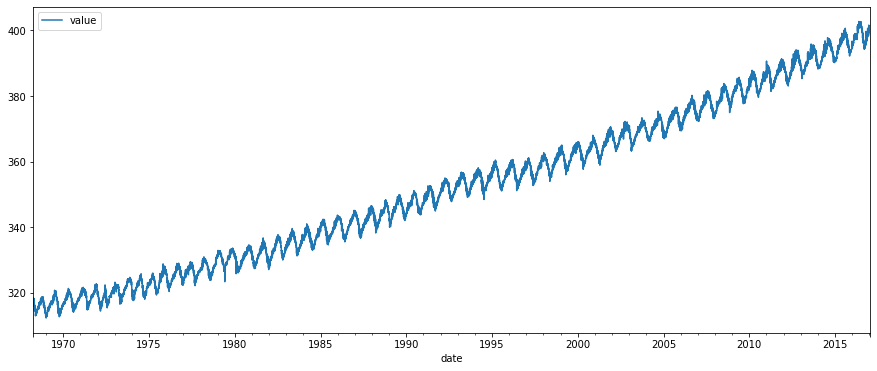

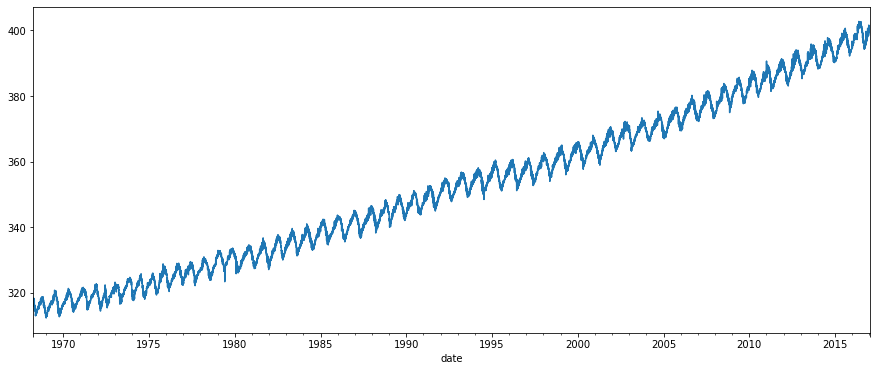

In [22]:
#CO2 training daily basis
train.plot(figsize=(15, 6))
plt.show()
#Average CO2 monthly basis
y.plot(figsize=(15, 6))
plt.show()

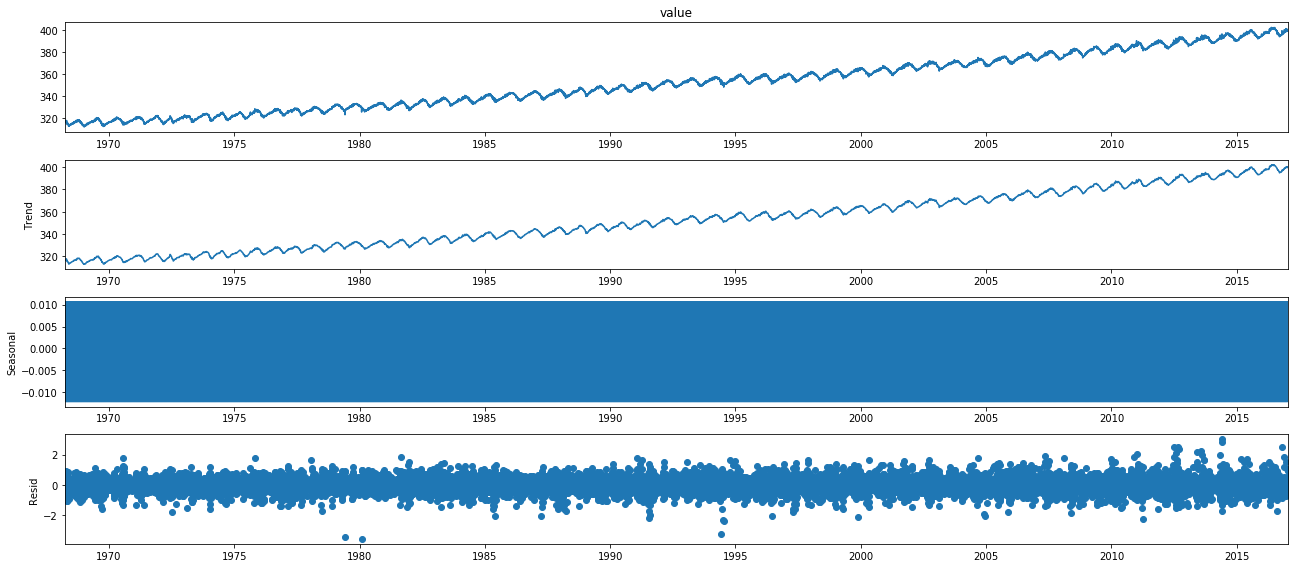

In [23]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [24]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [25]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
# Hypothesis 
# H0: Data are stationary 
# H1: Data are not stationary

kpss_test(y)

KPSS Statistic: 39.073471922105476
p-value: 0.01
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [26]:
train

,value
date,
1968-03-30,316.16
1968-03-31,316.40
1968-04-01,317.67
1968-04-02,317.76
1968-04-03,317.09
...,...
2017-01-12,400.04
2017-01-13,399.99
2017-01-14,399.80


In [27]:
# train_log=train
# train_log['value']=np.log(train_log['value'])
# # train['value'] = train['value'] - train['value'].shift(1)
# train_log.fillna(method = 'ffill')
# train_log

In [28]:
train

,value
date,
1968-03-30,316.16
1968-03-31,316.40
1968-04-01,317.67
1968-04-02,317.76
1968-04-03,317.09
...,...
2017-01-12,400.04
2017-01-13,399.99
2017-01-14,399.80


In [29]:
# from numpy import inf
# y_log = train_log['value'].resample('MS').mean()
# y_log[y_log==-inf]=0
# y_log[y_log==inf]=0
# y_log
# min(y_log)
# y_log[y_log.isna()==True]=
# print(y_log.isna())

In [83]:
# y_log=y_log.fillna(method = 'ffill')

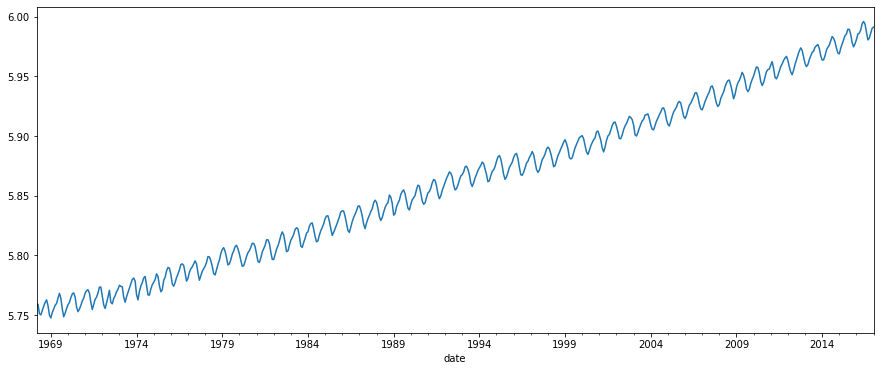

In [84]:
# y_log.plot(figsize=(15, 6))
# plt.show()

In [31]:
kpss_test(y)

KPSS Statistic: 39.073471922105476
p-value: 0.01
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [33]:
train_diff=train
train_diff['value'] = train['value'] - train['value'].shift(12)
train_diff.fillna(method = 'ffill')
train_diff.dropna(inplace=True)
train_diff

,value
date,
1968-04-11,1.58
1968-04-12,1.40
1968-04-13,-1.15
1968-04-14,-0.70
1968-04-15,0.16
...,...
2017-01-12,-1.15
2017-01-13,-0.62
2017-01-14,-0.42


In [35]:
from numpy import inf

In [36]:
y_diff = train_diff['value'].resample('D').mean()
y_diff[y_diff==-inf]=0
y_diff[y_diff==inf]=0
y_diff

date
1968-04-11    1.58
1968-04-12    1.40
1968-04-13   -1.15
1968-04-14   -0.70
1968-04-15    0.16
              ... 
2017-01-12   -1.15
2017-01-13   -0.62
2017-01-14   -0.42
2017-01-15    0.06
2017-01-16    0.84
Freq: D, Name: value, Length: 17813, dtype: float64

In [37]:
y_diff=y_diff.fillna(method = 'ffill')

In [38]:
y_diff

date
1968-04-11    1.58
1968-04-12    1.40
1968-04-13   -1.15
1968-04-14   -0.70
1968-04-15    0.16
              ... 
2017-01-12   -1.15
2017-01-13   -0.62
2017-01-14   -0.42
2017-01-15    0.06
2017-01-16    0.84
Freq: D, Name: value, Length: 17813, dtype: float64

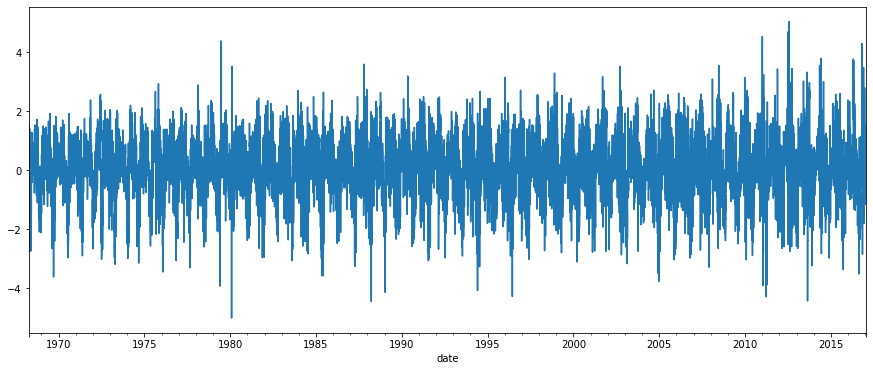

In [39]:
y_diff.plot(figsize=(15, 6))
plt.show()

In [40]:
kpss_test(y_diff)

KPSS Statistic: 0.030273933161632707
p-value: 0.1
num lags: 44
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [41]:
y_diff

date
1968-04-11    1.58
1968-04-12    1.40
1968-04-13   -1.15
1968-04-14   -0.70
1968-04-15    0.16
              ... 
2017-01-12   -1.15
2017-01-13   -0.62
2017-01-14   -0.42
2017-01-15    0.06
2017-01-16    0.84
Freq: D, Name: value, Length: 17813, dtype: float64

In [42]:
train

,value
date,
1968-04-11,1.58
1968-04-12,1.40
1968-04-13,-1.15
1968-04-14,-0.70
1968-04-15,0.16
...,...
2017-01-12,-1.15
2017-01-13,-0.62
2017-01-14,-0.42


In [43]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [44]:
aic=[]
temp=0
lowest=10000000000000000000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_diff,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic.append(results.aic)
            temp=results.aic
            if(temp<lowest):
                lowest=temp
                l_param=param
                l_param_seasonal=param_seasonal
            
        except:
            continue
print(min(aic))
print(lowest)
print(l_param)
print(l_param_seasonal)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:49148.44073041983
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:49121.75996166642
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:61402.685522663014
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:49109.98732328616
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:49123.50769087943
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:48645.734730146156
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:52448.111247164095
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:49309.58066855671
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:42107.343449998436
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:41572.1067506424
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:57178.265880735154
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:42098.739621909444
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:41376.59591958113
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:41253.08939306808
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:47434.76389637739
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:42442.25489913095
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:41225.825114475316
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:28562.838295758254
ARI

In [46]:
mod = sm.tsa.statespace.SARIMAX(y_diff,order=l_param,seasonal_order=l_param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
model_fit= mod.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                17813
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood              -12967.104
Date:                            Mon, 25 May 2020   AIC                          25942.209
Time:                                    13:24:35   BIC                          25973.356
Sample:                                04-11-1968   HQIC                         25952.457
                                     - 01-16-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3453      0.012     29.343      0.000       0.322       0.368
ma.L1         -0.7192      0.009   

In [98]:
model_fit.save('TS_model_for_CO2.pkl')

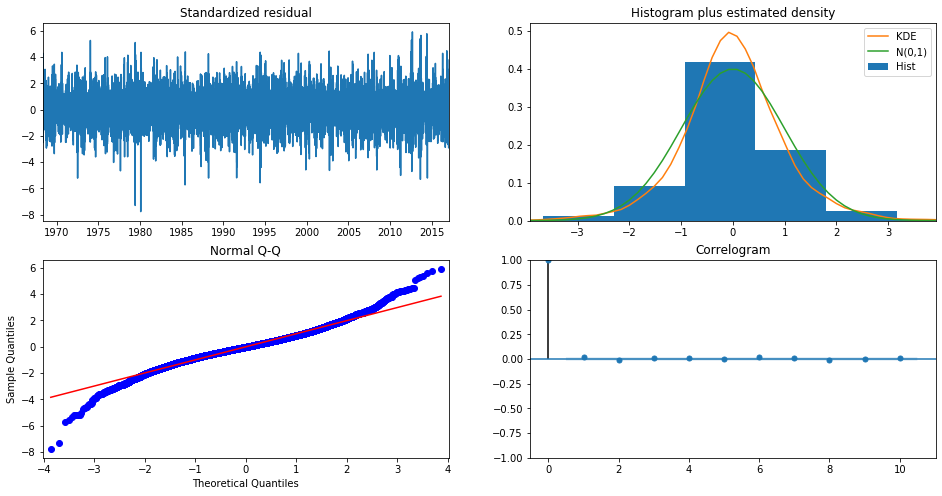

In [99]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [100]:
pred = results.get_prediction(start=pd.to_datetime('2004-04-01'), dynamic=False)
pred_ci = pred.conf_int()

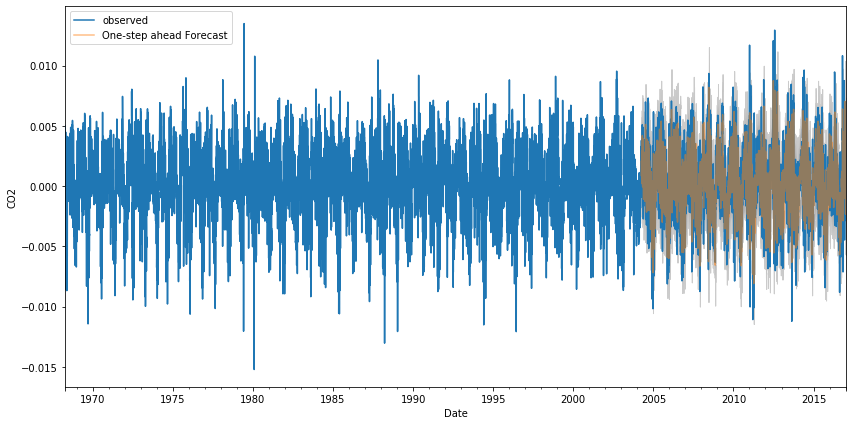

In [101]:
ax = y_diff['1968-03':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2')
plt.legend()


In [102]:
y_forecasted = pred.predicted_mean
y_truth = y_log['2004-01-21':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 35.42
The Root Mean Squared Error of our forecasts is 5.95


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2095: RuntimeWarning: invalid value encountered in multiply
  endog = np.empty((nforecast, self.k_endog)) * np.nan


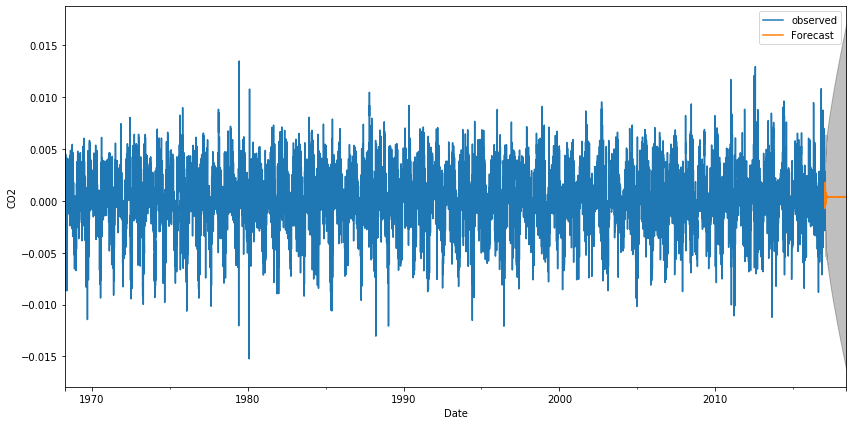

In [103]:
pred_uc = results.get_forecast(steps=500)
pred_ci = pred_uc.conf_int()
ax = y_diff.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2')
plt.legend()
plt.show()

In [55]:
model_loaded = AutoRegResults.load('TS_model_for_CO2.pkl')
print(model_loaded.params)

ar.L1       0.334796
ma.L1      -0.711029
ma.S.L12    0.014148
sigma2      0.235539
dtype: float64


In [56]:
train

,value
date,
1968-04-11,0.004985
1968-04-12,0.004415
1968-04-13,-0.003627
1968-04-14,-0.002205
1968-04-15,0.000504
...,...
2009-04-30,0.002811
2009-05-01,0.003877
2009-05-02,-0.001273


In [57]:
train_log

,value
date,
1968-04-11,0.004985
1968-04-12,0.004415
1968-04-13,-0.003627
1968-04-14,-0.002205
1968-04-15,0.000504
...,...
2009-04-30,0.002811
2009-05-01,0.003877
2009-05-02,-0.001273


In [58]:
train_diff

,value
date,
1968-04-11,0.004985
1968-04-12,0.004415
1968-04-13,-0.003627
1968-04-14,-0.002205
1968-04-15,0.000504
...,...
2009-04-30,0.002811
2009-05-01,0.003877
2009-05-02,-0.001273


In [59]:
y

date
1968-03-30    316.16
1968-03-31    316.40
1968-04-01    317.67
1968-04-02    317.76
1968-04-03    317.09
               ...  
2009-04-30    384.79
2009-05-01    385.03
2009-05-02    384.82
2009-05-03    384.65
2009-05-04    384.66
Freq: D, Name: value, Length: 15011, dtype: float64

In [60]:
# test.set_index('date')

date
2006-09-21    2.685714e+164
2006-09-22    2.120690e+164
2006-09-23    2.489390e+164
2006-09-24    2.168029e+164
2006-09-25    1.885727e+164
                  ...      
2009-04-30    1.267242e+167
2009-05-01    1.283205e+167
2009-05-02    1.533467e+167
2009-05-03    1.362640e+167
2009-05-04    1.209388e+167
Freq: D, Length: 957, dtype: float64

In [65]:
model_loaded.predict('2029-06-25')

2029-06-25    384.732062
Freq: D, dtype: float64